# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [3]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('otto_group.csv')
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [10]:
# Your code here
data.isna().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

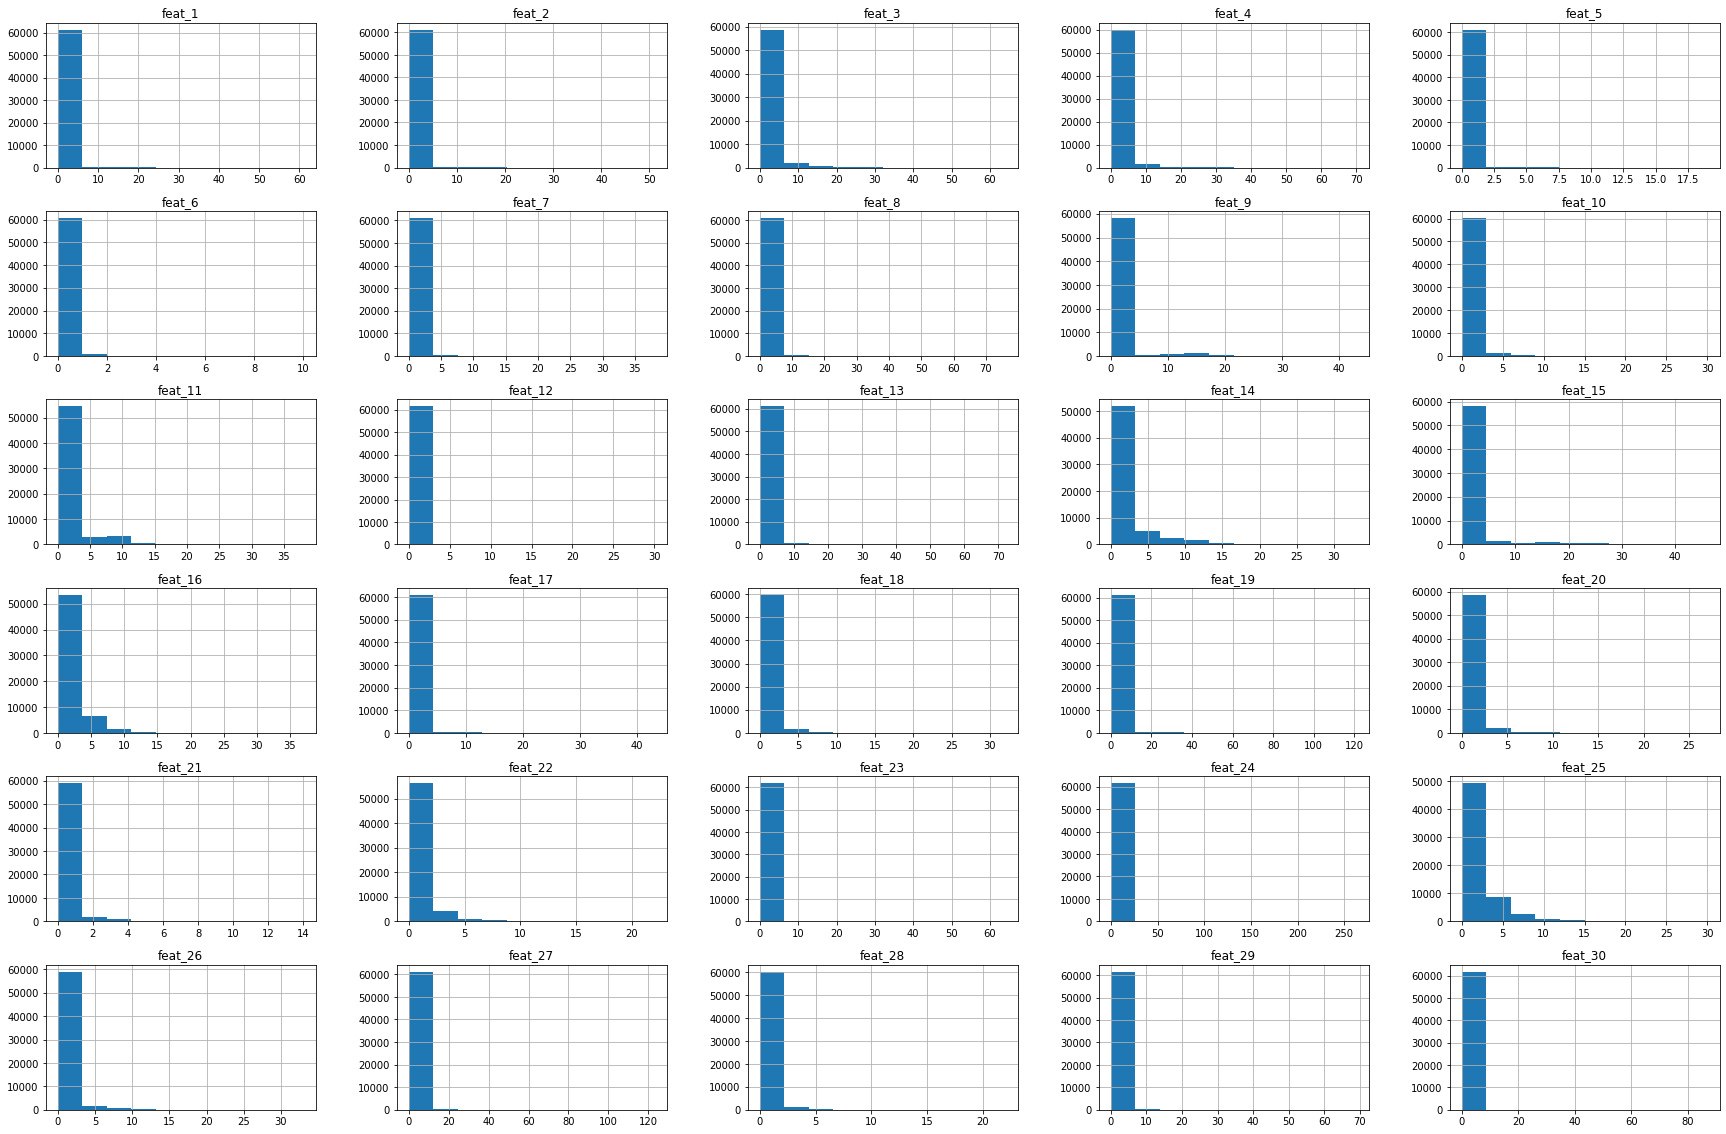

In [48]:
feat = data.loc[:, 'feat_1':'feat_30']
feat.hist(figsize=(30,20));

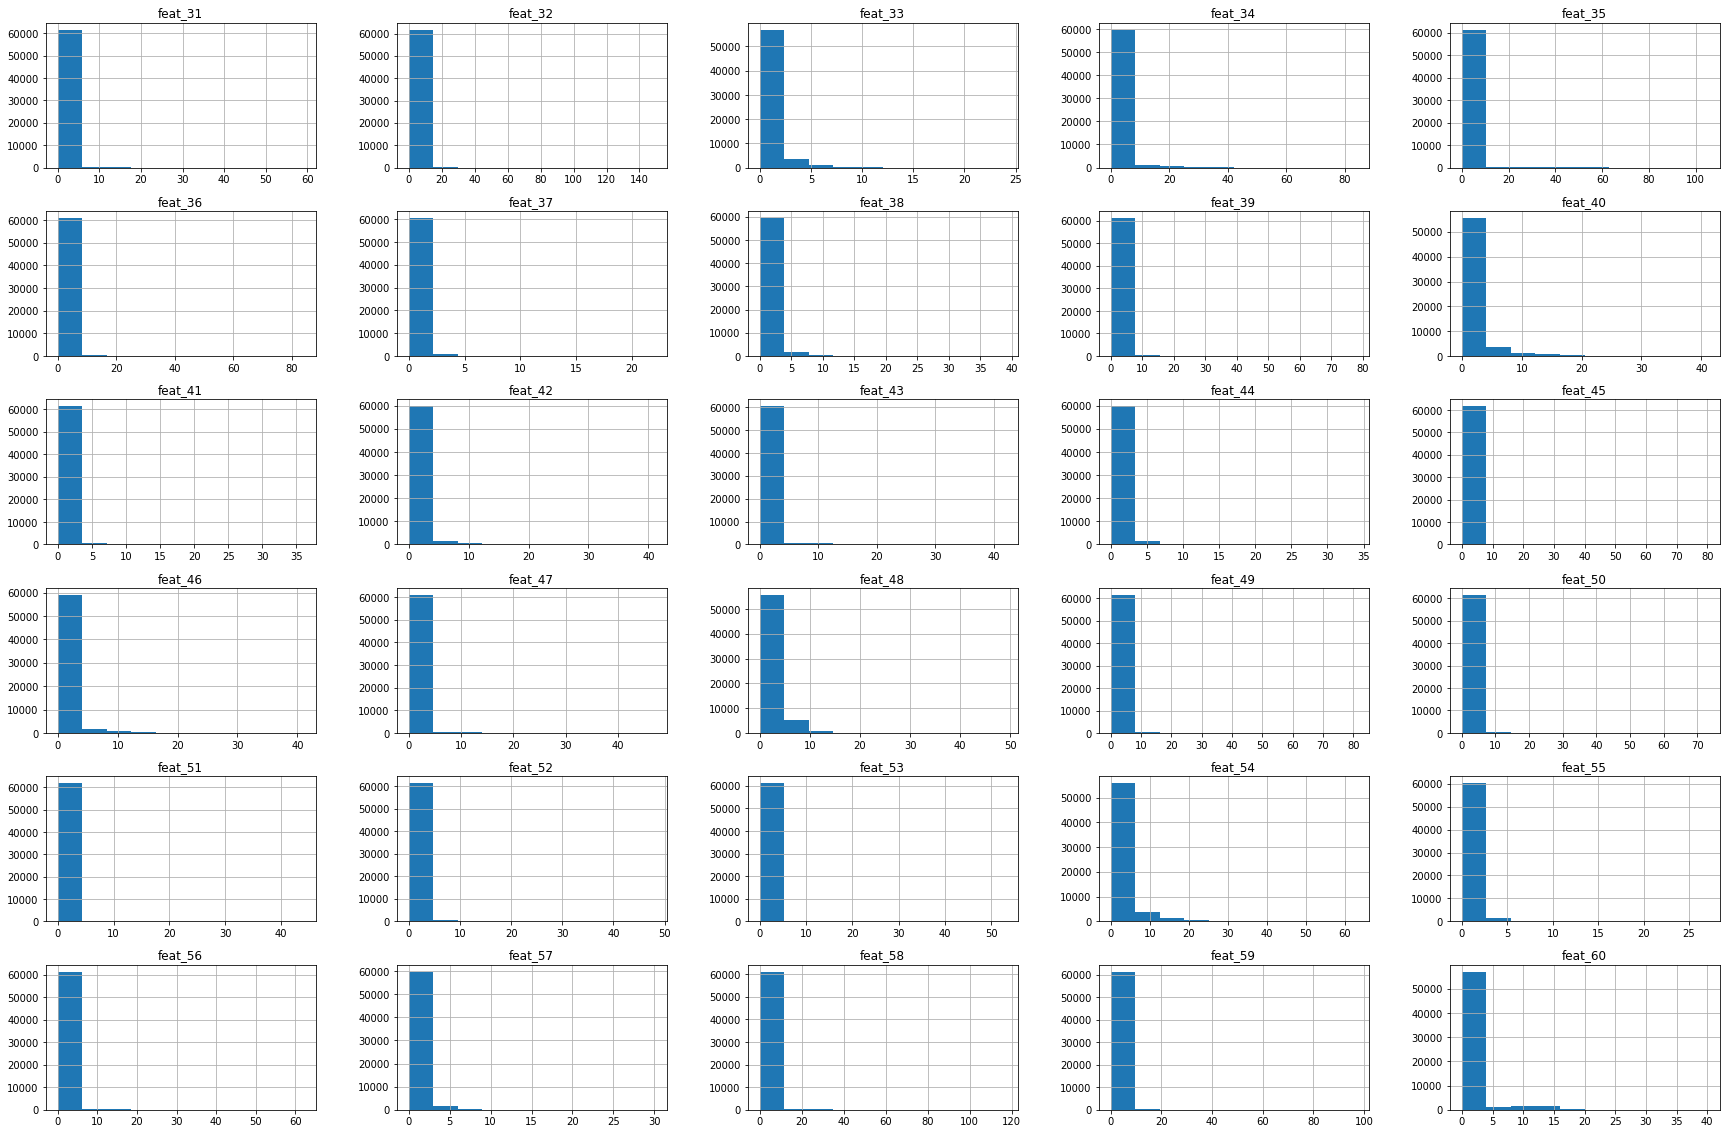

In [49]:
feat = data.loc[:, 'feat_31':'feat_60']
feat.hist(figsize=(30,20));

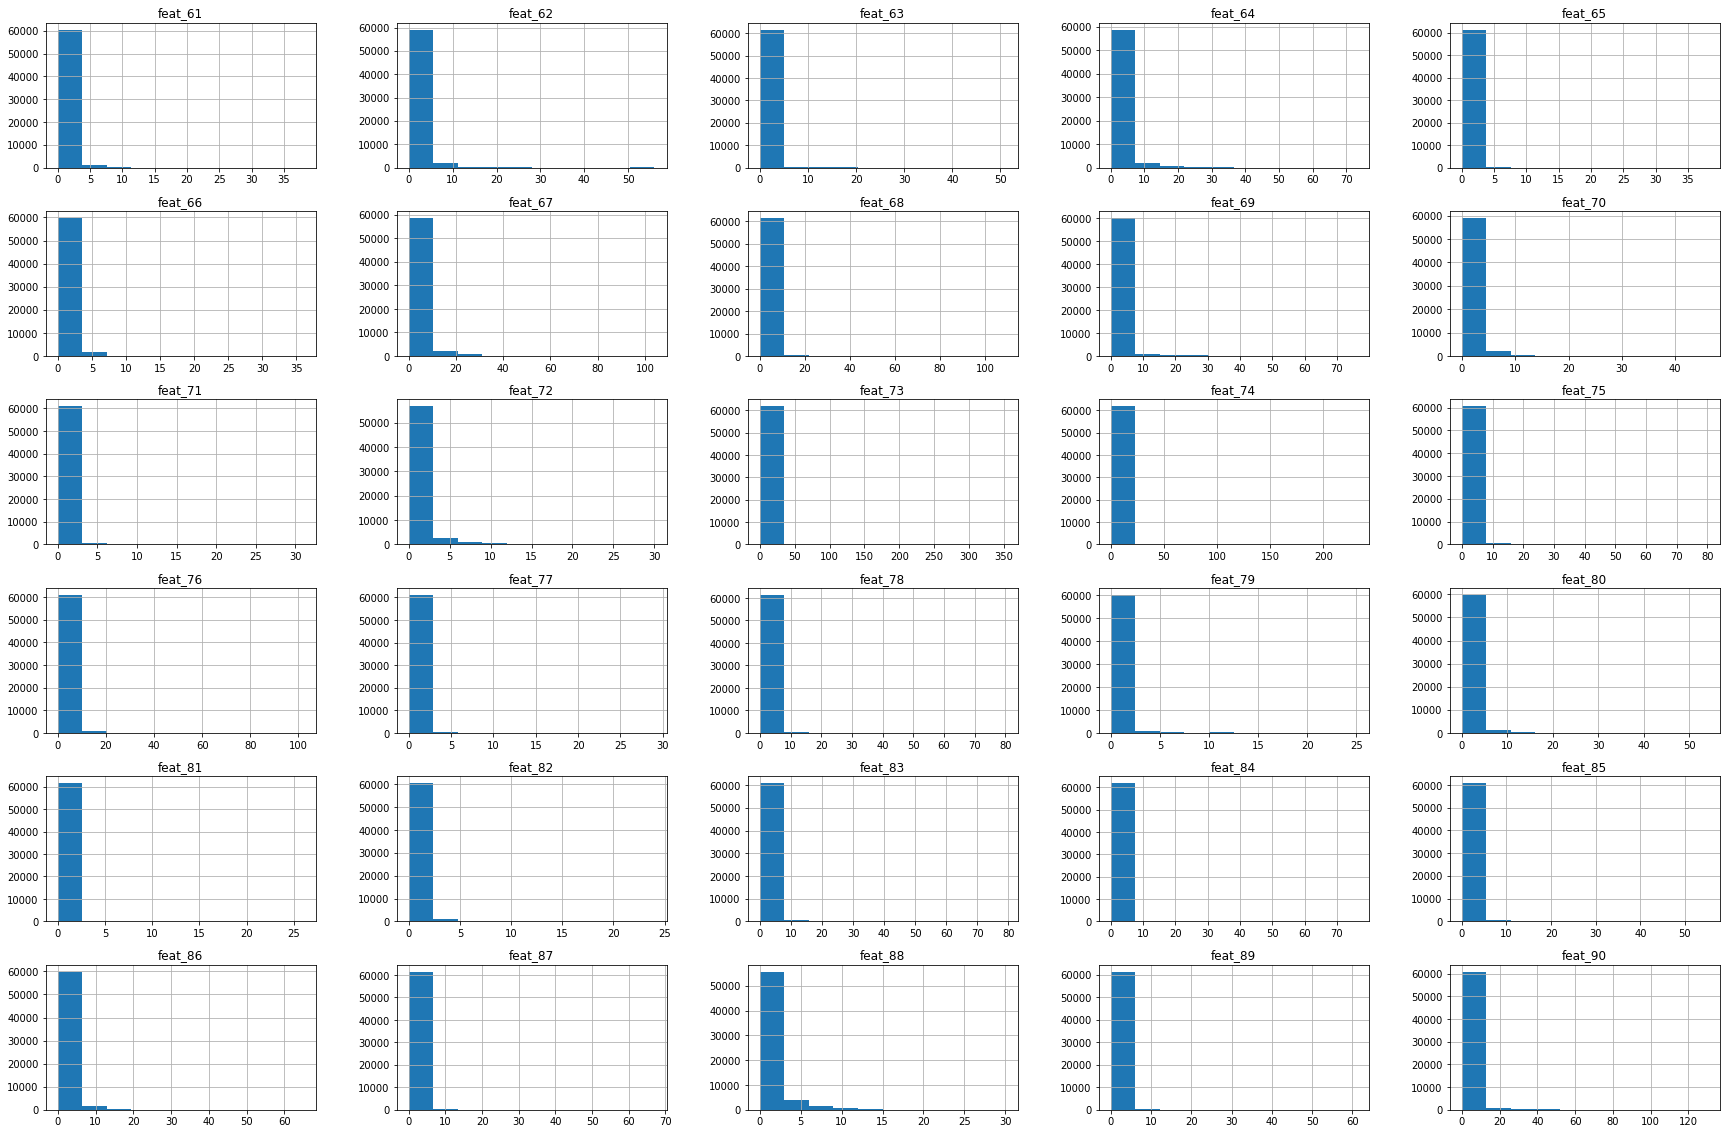

In [50]:
feat = data.loc[:, 'feat_61':'feat_90']
feat.hist(figsize=(30,20));

*this is sparse data that is 0 inflated*

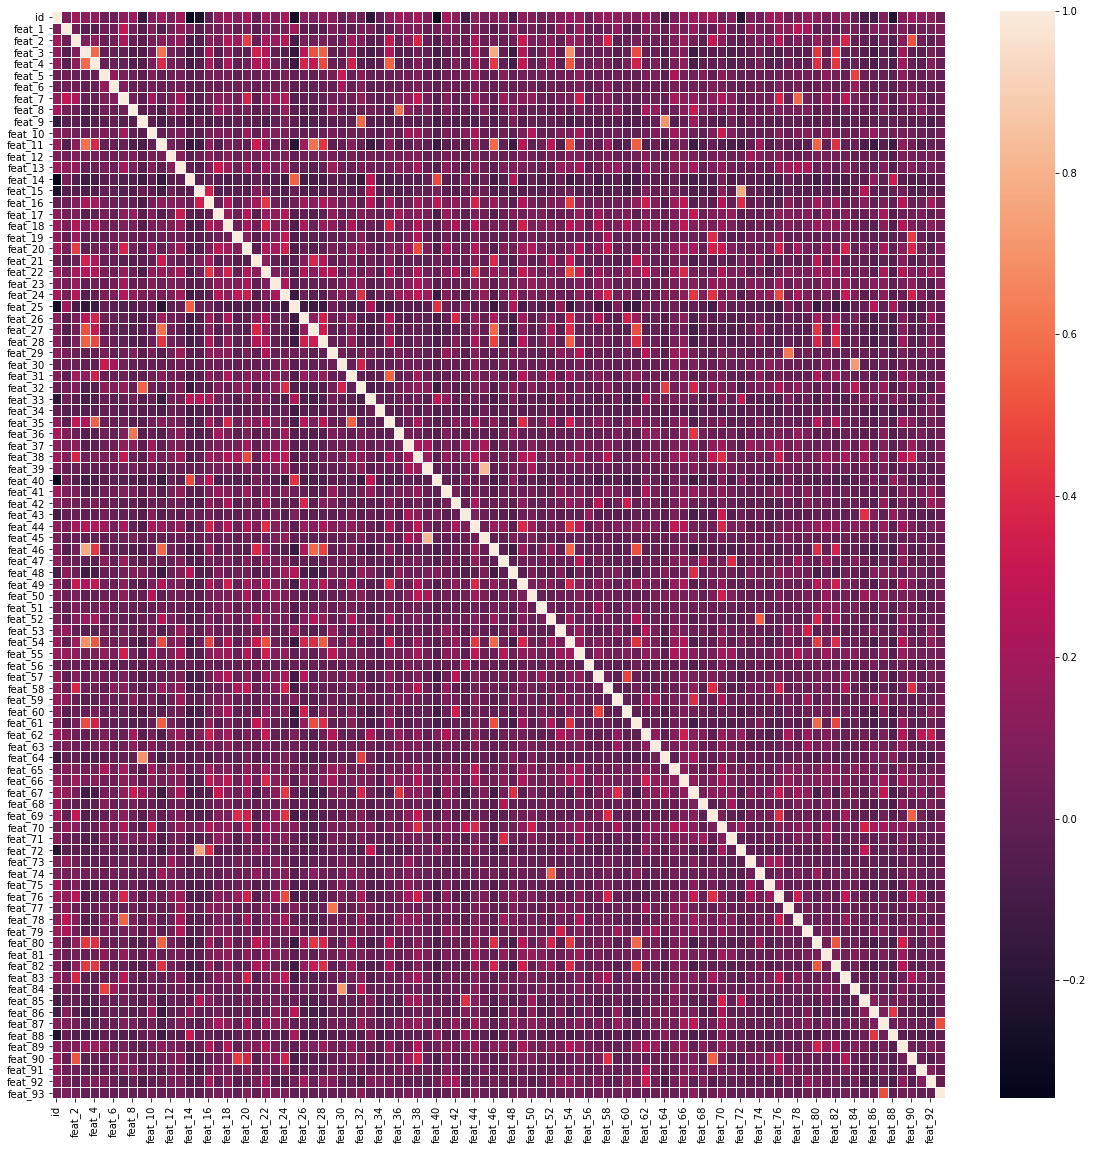

In [47]:
# Your code here
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data.corr(), linewidths=.5, ax=ax);

In [53]:
# Your code here
X = data.drop(['id','target'],axis=1)
y = data['target']

In [ ]:
# Your code here

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

In [ ]:
# Your code here

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [ ]:
# Your code here

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
# Your code here

Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [70]:
# Your code here
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=10)
pca_2 = PCA(n_components=20)
pca_3 = PCA(n_components=30)
pca_4 = PCA(n_components=40)

pca_1.fit_transform(X)
pca_2.fit_transform(X)
pca_3.fit_transform(X)#WINNER WINNER
features = pca_4.fit_transform(X)

print(f'10 principle components: {np.sum(pca_1.explained_variance_ratio_)}')
print(f'20 principle components: {np.sum(pca_2.explained_variance_ratio_)}')
print(f'30 principle components: {np.sum(pca_3.explained_variance_ratio_)}')
print(f'40 principle components: {np.sum(pca_4.explained_variance_ratio_)}')

10 principle components: 0.5360066801499495
20 principle components: 0.7275175619384581
30 principle components: 0.824233923531077
40 principle components: 0.8885596269553402


<AxesSubplot:>

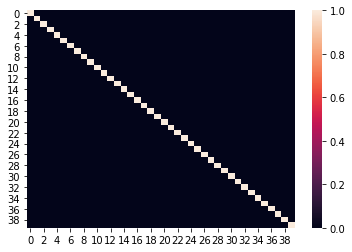

In [71]:
sns.heatmap(pd.DataFrame(features).corr())

## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [74]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.4)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline([('pca',PCA(n_components=30,random_state=42)),
                       ('clf',LogisticRegression(random_state=42,max_iter=2000))])
logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_test,y_test))


0.7320216548157724


## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [ ]:
# Your code here

In [ ]:
# Your code here

In [83]:
# Your code here
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [86]:
# Your code here
# ⏰ This cell may take several minutes to run

svm_pipe = Pipeline([('pca',PCA(n_components=30,random_state=42)),
                       ('clf',LinearSVC())])
tree_pipe = Pipeline([('pca',PCA(n_components=30,random_state=42)),
                       ('clf',DecisionTreeClassifier())])
rf_pipe = Pipeline([('pca',PCA(n_components=30,random_state=42)),
                       ('clf',RandomForestClassifier())])
ada_pipe = Pipeline([('pca',PCA(n_components=30,random_state=42)),
                       ('clf',AdaBoostClassifier())])

svm_pipe.fit(X_train,y_train)
print(f'SVC Classifier Score:{svm_pipe.score(X_test,y_test)}')
tree_pipe.fit(X_train,y_train)
print(f'Decision Tree Classifier Score:{tree_pipe.score(X_test,y_test)}')
rf_pipe.fit(X_train,y_train)
print(f'Random Forest Classifier Score:{rf_pipe.score(X_test,y_test)}')
ada_pipe.fit(X_train,y_train)
print(f'AdaBoost Classifier Score:{ada_pipe.score(X_test,y_test)}')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC Classifier Score:0.7209114414996768
Decision Tree Classifier Score:0.6708548804137039
Random Forest Classifier Score:0.7729072398190046
AdaBoost Classifier Score:0.6180914673561733


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [ ]:
# Your code here 
# imports

In [ ]:
# Your code here
# ⏰ This cell may take a long time to run!


Use your grid search object along with `.cv_results` to get the full result overview

In [ ]:
# Your code here 

### AdaBoost

In [ ]:
# Your code here
# ⏰ This cell may take several minutes to run

Use your grid search object along with `.cv_results` to get the full result overview: 

In [ ]:
# Your code here 

### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [ ]:
# Your code here
# ⏰ This cell may take a very long time to run!

Use your grid search object along with `.cv_results` to get the full result overview: 

In [ ]:
# Your code here 

## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?